In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 12

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 13)                143       
                                                                 
Total params: 1213 (4.74 KB)
Trainable params: 1213 (4.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/63 [..............................] - ETA: 17s - loss: 2.6468 - accuracy: 0.0859
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
63/63 [==============================] - 1s 5ms/step - loss: 2.4906 - accuracy: 0.1720 - val_loss: 2.3033 - val_accuracy: 0.3409
Epoch 2/1000
 1/63 [..............................] - ETA: 0s - loss: 2.3228 - accuracy: 0.2891
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
63/63 [==============================] - 0s 1ms/step - loss: 2.2133 - accuracy: 0.2897 - val_loss: 1.9493 - val_accuracy: 0.4266
Epoch 3/1000
 1/63 [..............................] - ETA: 0s - loss: 2.0660 - accuracy: 0.3203
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
63/63 [==============================] - 0s 1ms/step - loss: 1.9609 - accuracy: 0.3522 - val_loss: 1.6920 - val_accuracy: 0.4981
Epoch 4/1000
 1/63 [..............................] - ETA: 0s - loss: 1.7277 - accuracy: 0.4609

/Users/tyler/Desktop/SCHOOL/CAPSTONE/OpenCV/open_cv_env/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


62/63 [============================>.] - ETA: 0s - loss: 1.7536 - accuracy: 0.3996
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
63/63 [==============================] - 0s 1ms/step - loss: 1.7535 - accuracy: 0.3996 - val_loss: 1.4839 - val_accuracy: 0.6084
Epoch 5/1000
 1/63 [..............................] - ETA: 0s - loss: 1.7409 - accuracy: 0.4141
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
63/63 [==============================] - 0s 1ms/step - loss: 1.6049 - accuracy: 0.4548 - val_loss: 1.3157 - val_accuracy: 0.6780
Epoch 6/1000
 1/63 [..............................] - ETA: 0s - loss: 1.5071 - accuracy: 0.5078
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
63/63 [==============================] - 0s 1ms/step - loss: 1.5111 - accuracy: 0.4826 - val_loss: 1.1752 - val_accuracy: 0.7246
Epoch 7/1000
 1/63 [..............................] - ETA: 0s - loss: 1.4203 - accuracy: 0.4844
Epoch 7: savin

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

21/21 [==============================] - 0s 613us/step - loss: 0.2087 - accuracy: 0.9594


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 47ms/step
[5.82313165e-04 7.89851665e-01 4.20719199e-02 1.29971039e-02
 1.55169303e-02 7.59731571e-04 7.21622119e-03 7.38789851e-04
 1.02603585e-01 2.75890250e-02 1.59841111e-05 5.66220770e-05
 2.24553283e-08]
1


# Confusion matrix

84/84 [==============================] - 0s 486us/step


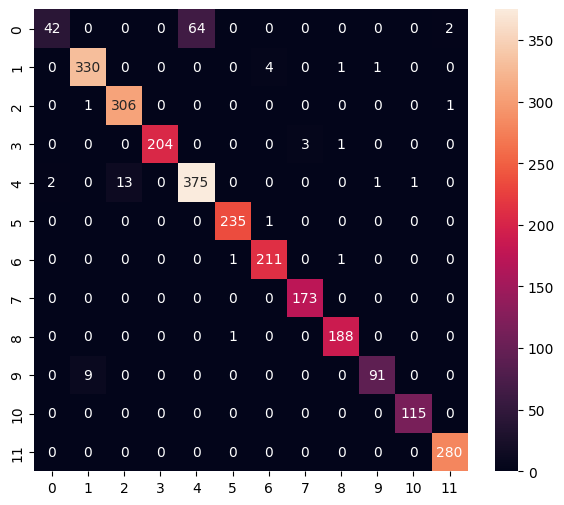

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.39      0.55       108
           1       0.97      0.98      0.98       336
           2       0.96      0.99      0.98       308
           3       1.00      0.98      0.99       208
           4       0.85      0.96      0.90       392
           5       0.99      1.00      0.99       236
           6       0.98      0.99      0.98       213
           7       0.98      1.00      0.99       173
           8       0.98      0.99      0.99       189
           9       0.98      0.91      0.94       100
          10       0.99      1.00      1.00       115
          11       0.99      1.00      0.99       280

    accuracy                           0.96      2658
   macro avg       0.97      0.93      0.94      2658
weighted avg       0.96      0.96      0.95      2658



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/Users/tyler/Desktop/SCHOOL/CAPSTONE/OpenCV/open_cv_env/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/4l/qwn4ljgj73j80nqb2176qccr0000gn/T/tmpm8dvj1gy/assets


INFO:tensorflow:Assets written to: /var/folders/4l/qwn4ljgj73j80nqb2176qccr0000gn/T/tmpm8dvj1gy/assets
2024-03-19 20:29:55.646574: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-03-19 20:29:55.646590: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
Summary on the non-converted ops:
---------------------------------
 * Accepted dialects: tfl, builtin, func
 * Non-Converted Ops: 6, Total Ops 13, % non-converted = 46.15 %
 * 6 ARITH ops

- arith.constant:    6 occurrences  (f32: 6)



  (f32: 3)
  (f32: 1)


6940

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 512 µs, sys: 731 µs, total: 1.24 ms
Wall time: 965 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.8231317e-04 7.8985167e-01 4.2071920e-02 1.2997105e-02 1.5516930e-02
 7.5973157e-04 7.2162212e-03 7.3878944e-04 1.0260361e-01 2.7589034e-02
 1.5984111e-05 5.6622077e-05 2.2455286e-08]
1
